In [1]:
import xarray as xr

In [2]:
aggr_url = "https://thredds.jpl.nasa.gov/thredds/dodsC/OceanTemperature/CMC0.2deg-CMC-L4-GLOB-v2.0.nc"
data = xr.open_dataset(aggr_url,chunks={'time':100})

In [3]:
#sst=data['analysed_sst'].sel(lat=slice(-27.5, -27.2), lon=slice(153.6,153.8)) #SEQ200
#sst=data['analysed_sst'].sel(lat=slice(-30.4,-30.1), lon=slice(153.3,153.5)) #CH100
#sst=data['analysed_sst'].sel(lat=slice(-32.6,-32.3), lon=slice(152.6,152.8)) #CH100
#sst=data['analysed_sst'].sel(lat=slice(-34.2,-33.9), lon=slice(151.3,151.5)) #SYD140
#sst=data['analysed_sst'].sel(lat=slice(-36.3,-36), lon=slice(150.1,150.3)) #BMP
#sst=data['analysed_sst'].sel(lat=slice(-42.7,-42.4), lon=slice(148.2,148.4)) #MIS
sst=data['analysed_sst'].sel(lat=slice(-43,-26), lon=slice(148,165)) #Whole System

In [4]:
sstmean = sst.mean(dim='lat')
sstmean = sstmean.mean(dim='lon')

In [5]:
# Enable a Dask progress bar
from dask.diagnostics import ProgressBar
ProgressBar().register()
sstmean.to_netcdf('CMC_temp_MIS.nc')

[########################################] | 100% Completed | 11min 31.5s


In [6]:
sstnc=xr.open_dataset('CMC_temp_MIS.nc')
sstnc

<xarray.Dataset>
Dimensions:       (time: 9330)
Coordinates:
  * time          (time) datetime64[ns] 1991-09-01T12:00:00 ... 2017-03-17T12:00:00
Data variables:
    analysed_sst  (time) float32 ...

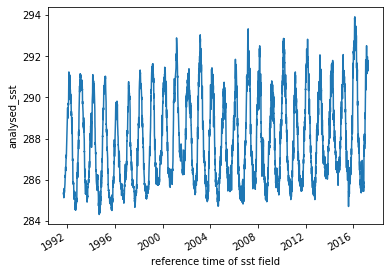

In [8]:
sstnc.analysed_sst.plot()